In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv('50_startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
dataset.corr() #finding the corelation between data 

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


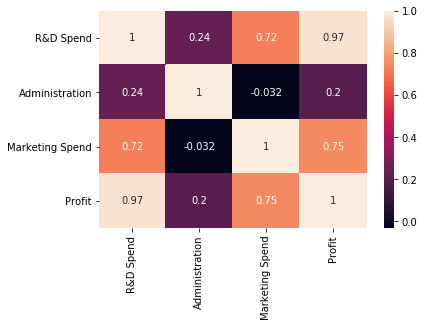

In [4]:
sns.heatmap(dataset.corr(),annot=True)

In [5]:
dataset.isnull().any()

R&D Spend          False
Administration     False
Marketing Spend    False
State              False
Profit             False
dtype: bool

In [6]:
x=dataset.iloc[:,0:4].values

In [7]:
y=dataset.iloc[:,4:].values

In [8]:
ct = ColumnTransformer([("oh",OneHotEncoder(),[3])],remainder="passthrough")
x=ct.fit_transform(x)
x

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

In [9]:
x.shape

(50, 6)

In [10]:
x=x[:,1:]#droping the dumy varable

In [11]:
x.shape

(50, 5)

In [12]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=0)

In [13]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(40, 5) (10, 5) (40, 1) (10, 1)


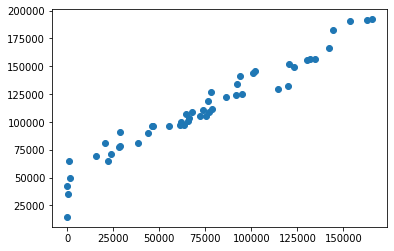

In [14]:
plt.scatter(x[:,2],y)

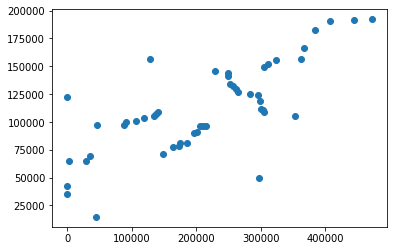

In [15]:
plt.scatter(x[:,4],y)

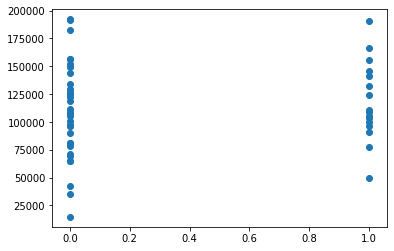

In [16]:
plt.scatter(x[:,0],y)

In [17]:
mr=LinearRegression()

In [18]:
mr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
y_predict=mr.predict(x_test)

In [20]:
y_predict

array([[103015.20159796],
       [132582.27760816],
       [132447.73845175],
       [ 71976.09851259],
       [178537.48221054],
       [116161.24230163],
       [ 67851.69209676],
       [ 98791.73374688],
       [113969.43533012],
       [167921.0656955 ]])

In [21]:
mr.predict([[1.0,0.0,18963.2,25649.6,56749.6]])

array([[59183.37762366]])

In [22]:
r2_score(y_test,y_predict)

0.9347068473282805